In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Read the CSV file into a DataFrame
df = pd.read_csv("Dataset RSL.csv")

# Drop columns with no data
df = df.drop(columns=['PowerCode Code', 'Reference Period Code', 'Flags', 'Flag Codes', 'Reference Period', 'YEA'])

DATA GATHERING AND CLEANING

In [4]:
# Identify missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each c5olumn:\n", missing_values)

# Impute missing values for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

Missing values in each c5olumn:
 GOV                    0
Level of government    0
TAX                    0
Revenue category       0
Year                   0
Unit Code              0
Unit                   0
PowerCode              0
Value                  0
dtype: int64


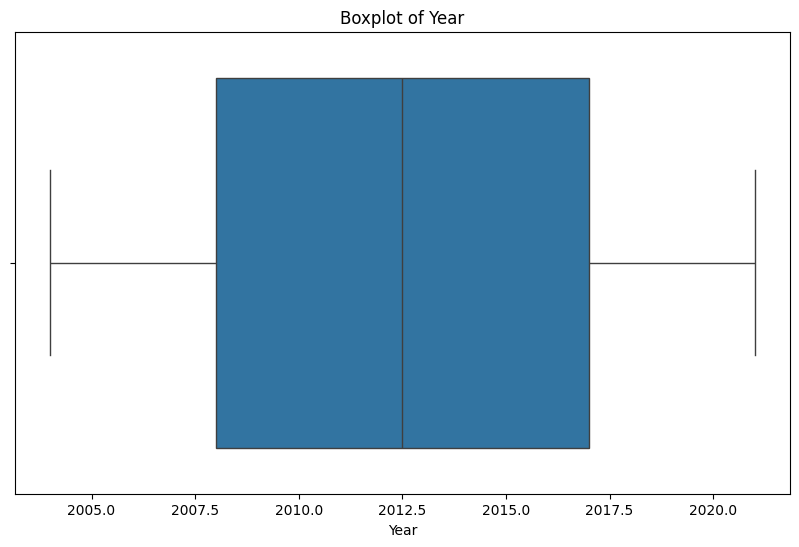

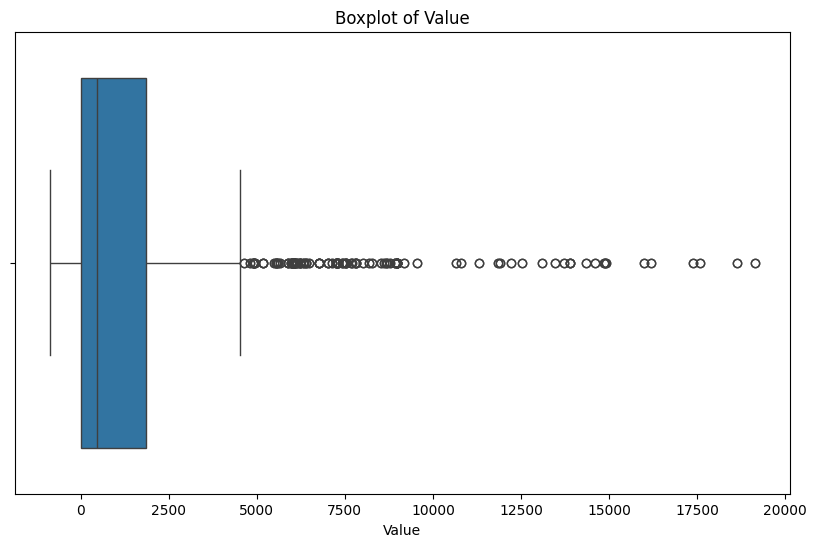

In [5]:
# Boxplots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [6]:
# Calculate z-scores
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Set a threshold for z-scores
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)
df_outliers_removed = df[~outliers]

print(f"Removed {outliers.sum()} outliers from the dataset.")


Removed 46 outliers from the dataset.


In [7]:
# Get a summary of the dataset
descriptive_stats = df.describe()
print("Descriptive statistics:\n", descriptive_stats)


Descriptive statistics:
               Year         Value
count  1728.000000   1728.000000
mean   2012.500000   1650.746302
std       5.189629   2940.416337
min    2004.000000   -866.652000
25%    2008.000000      0.000000
50%    2012.500000    464.790000
75%    2017.000000   1857.219000
max    2021.000000  19131.238000


In [8]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=[object]).columns

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

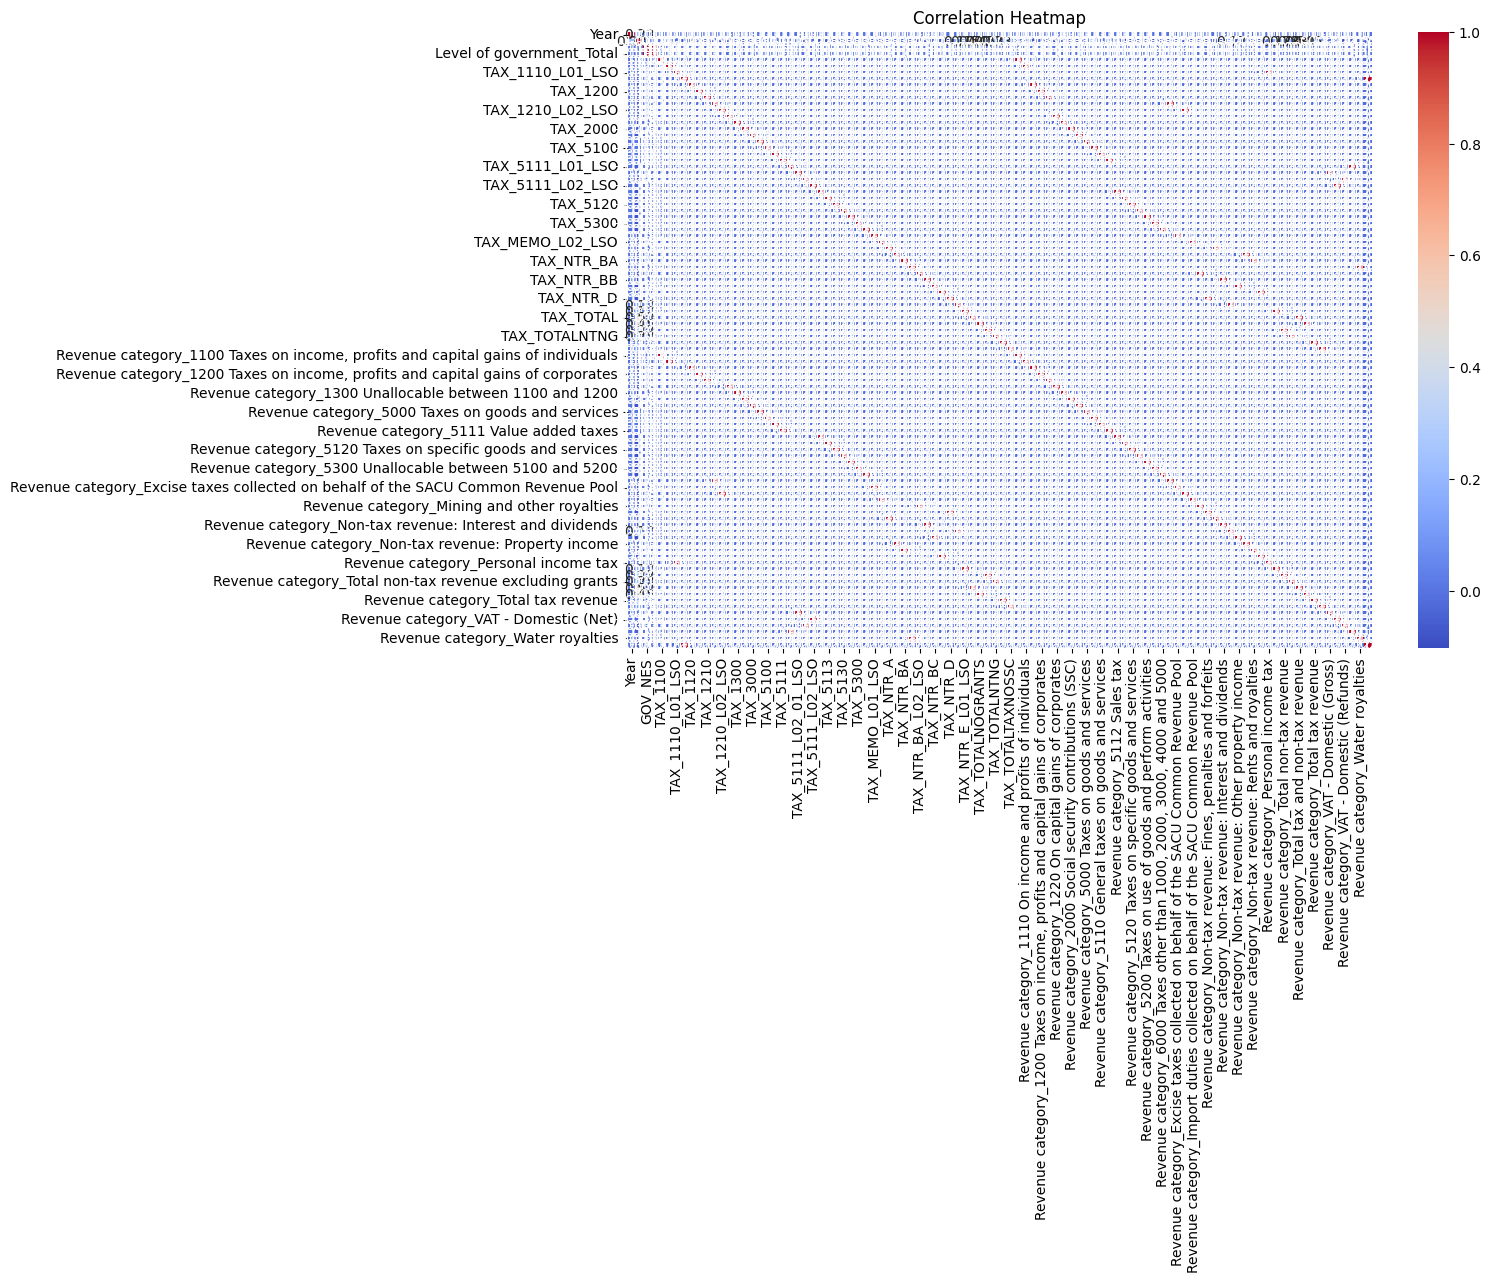

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

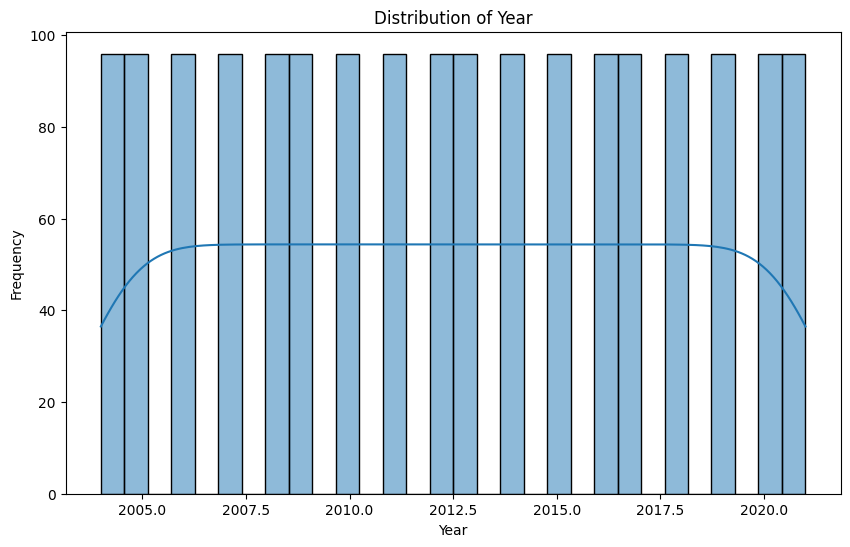

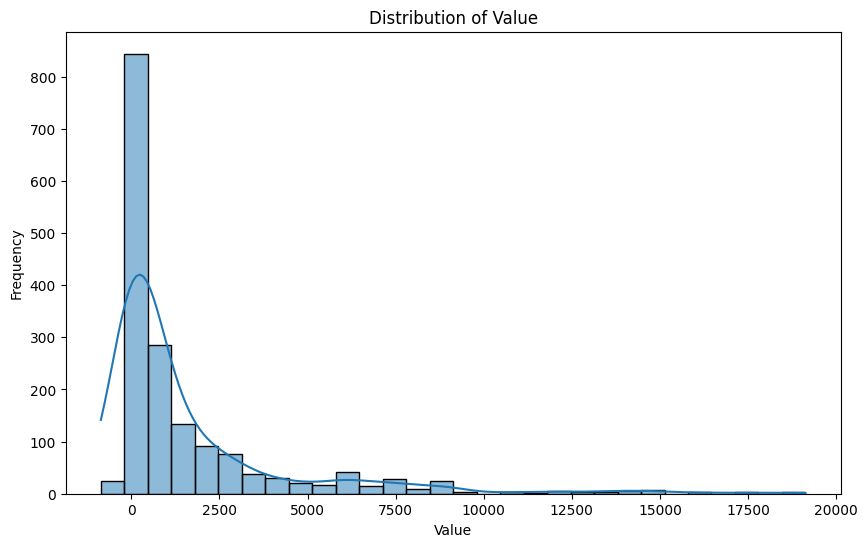

In [10]:
# Histograms for numerical features
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

FEATURE ENGINEERING

In [11]:
# Feature Engineering
# Separate features and target variable
X = df.drop(columns=['Value'])  # Assuming 'Value' is the target column for tax revenue prediction
y = df['Value']

# Feature Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combining scaled data with the target
df_scaled = pd.concat([X_scaled, y], axis=1)

In [12]:
# Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

In [13]:
# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 757083.1241053044
Mean Absolute Error: 596.7321437139774
R^2 Score: 0.9067601039743964


<ipython-input-14-53d461f8323b>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='blue')


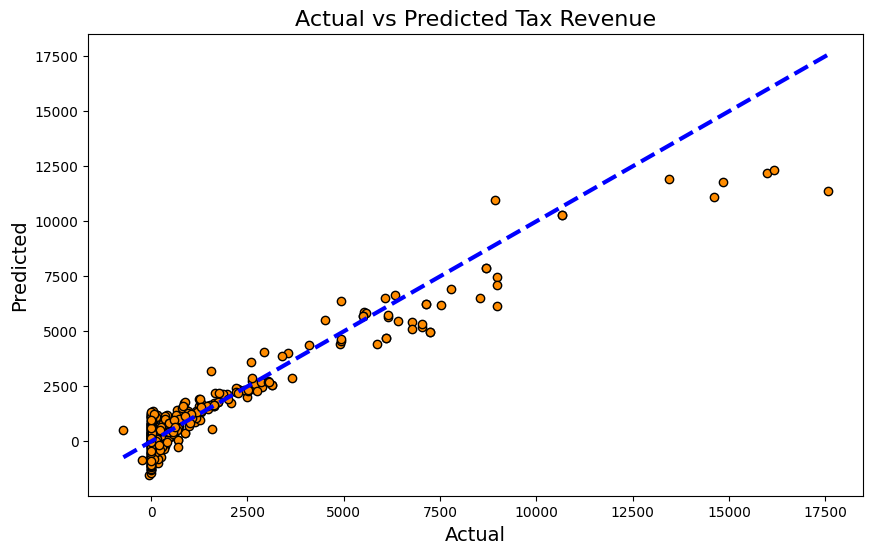

In [14]:
# Enhanced Scatter Plot for predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), color="darkorange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='blue')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Actual vs Predicted Tax Revenue', fontsize=16)
plt.show()

In [15]:
# Model Tuning
# Define a parameter grid for tuning Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [16]:
# Best model from grid search
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

In [17]:
# Calculate accuracy metrics for the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Mean Squared Error (tuned): {mse_tuned}')
print(f'Mean Absolute Error (tuned): {mae_tuned}')
print(f'R^2 Score (tuned): {r2_tuned}')

Mean Squared Error (tuned): 757254.0160401963
Mean Absolute Error (tuned): 581.0879184228936
R^2 Score (tuned): 0.9067390574793239


<ipython-input-18-29aed895df22>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='blue')


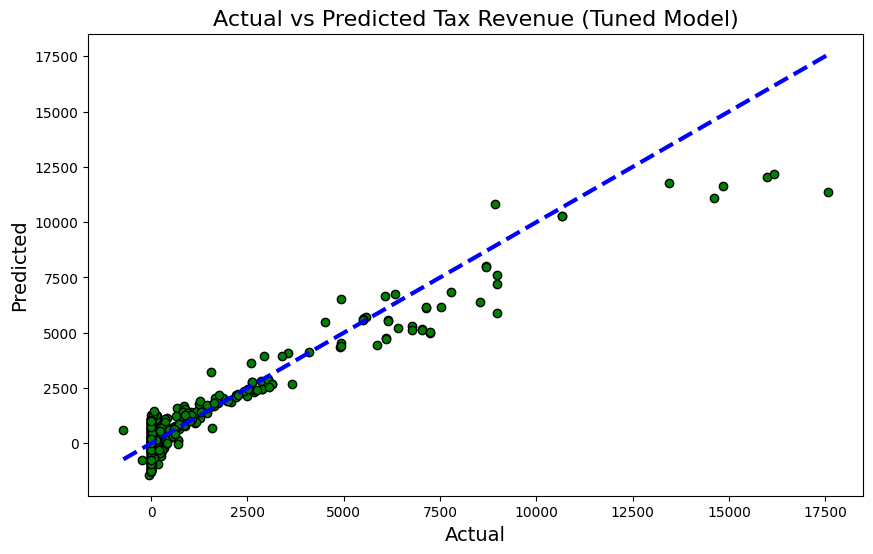

In [18]:
# Enhanced Scatter Plot for tuned predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, edgecolors=(0, 0, 0), color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='blue')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Actual vs Predicted Tax Revenue (Tuned Model)', fontsize=16)
plt.show()

In [23]:
import pickle


# Save the model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
